 **Import necessary libraries**

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error,mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

**Load the dataset**

In [3]:
data=pd.read_csv("C:\\Users\\HP\\Desktop\\Project\\co2 emission.ml\\co2.csv")
data

Make        Model   Vehicle Class  Engine Size(L)  Cylinders  \
0     ACURA          ILX         COMPACT             2.0          4   
1     ACURA          ILX         COMPACT             2.4          4   
2     ACURA   ILX HYBRID         COMPACT             1.5          4   
3     ACURA      MDX 4WD     SUV - SMALL             3.5          6   
4     ACURA      RDX AWD     SUV - SMALL             3.5          6   
...     ...          ...             ...             ...        ...   
7380  VOLVO  XC40 T5 AWD     SUV - SMALL             2.0          4   
7381  VOLVO  XC60 T5 AWD     SUV - SMALL             2.0          4   
7382  VOLVO  XC60 T6 AWD     SUV - SMALL             2.0          4   
7383  VOLVO  XC90 T5 AWD  SUV - STANDARD             2.0          4   
7384  VOLVO  XC90 T6 AWD  SUV - STANDARD             2.0          4   

     Transmission Fuel Type  Fuel Consumption City (L/100 km)  \
0             AS5         Z                               9.9   
1              M6         Z                              11.2   
2             AV7         Z                               6.0   
3             AS6         Z                              12.7   
4             AS6         Z                              12.1   
...           ...       ...                               ...   
7380          AS8         Z                              10.7   
7381          AS8         Z                              11.2   
7382          AS8         Z                              11.7   
7383          AS8         Z                              11.2   
7384          AS8         Z                              12.2   

      Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
0                                 6.7                               8.5   
1                                 7.7                               9.6   
2                                 5.8                               5.9   
3                                 9.1                              11.1   
4                                 8.7                              10.6   
...                               ...                               ...   
7380                              7.7                               9.4   
7381                              8.3                               9.9   
7382                              8.6                              10.3   
7383                              8.3                               9.9   
7384                              8.7                              10.7   

      Fuel Consumption Comb (mpg)  CO2 Emissions(g/km)  
0                              33                  196  
1                              29                  221  
2                              48                  136  
3                              25                  255  
4                              27                  244  
...                           ...                  ...  
7380                           30                  219  
7381                           29                  232  
7382                           27                  240  
7383                           29                  232  
7384                           26                  248  

[7385 rows x 12 columns]

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [5]:
data.columns

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object')

In [6]:
data.dtypes

Make                                 object
Model                                object
Vehicle Class                        object
Engine Size(L)                      float64
Cylinders                             int64
Transmission                         object
Fuel Type                            object
Fuel Consumption City (L/100 km)    float64
Fuel Consumption Hwy (L/100 km)     float64
Fuel Consumption Comb (L/100 km)    float64
Fuel Consumption Comb (mpg)           int64
CO2 Emissions(g/km)                   int64
dtype: object

In [7]:
data.shape

(7385, 12)

In [8]:
data.head()

Make       Model Vehicle Class  Engine Size(L)  Cylinders Transmission  \
0  ACURA         ILX       COMPACT             2.0          4          AS5   
1  ACURA         ILX       COMPACT             2.4          4           M6   
2  ACURA  ILX HYBRID       COMPACT             1.5          4          AV7   
3  ACURA     MDX 4WD   SUV - SMALL             3.5          6          AS6   
4  ACURA     RDX AWD   SUV - SMALL             3.5          6          AS6   

  Fuel Type  Fuel Consumption City (L/100 km)  \
0         Z                               9.9   
1         Z                              11.2   
2         Z                               6.0   
3         Z                              12.7   
4         Z                              12.1   

   Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
0                              6.7                               8.5   
1                              7.7                               9.6   
2                              5.8                               5.9   
3                              9.1                              11.1   
4                              8.7                              10.6   

   Fuel Consumption Comb (mpg)  CO2 Emissions(g/km)  
0                           33                  196  
1                           29                  221  
2                           48                  136  
3                           25                  255  
4                           27                  244

In [9]:
data.describe()

Engine Size(L)    Cylinders  Fuel Consumption City (L/100 km)  \
count     7385.000000  7385.000000                       7385.000000   
mean         3.160068     5.615030                         12.556534   
std          1.354170     1.828307                          3.500274   
min          0.900000     3.000000                          4.200000   
25%          2.000000     4.000000                         10.100000   
50%          3.000000     6.000000                         12.100000   
75%          3.700000     6.000000                         14.600000   
max          8.400000    16.000000                         30.600000   

       Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
count                      7385.000000                       7385.000000   
mean                          9.041706                         10.975071   
std                           2.224456                          2.892506   
min                           4.000000                          4.100000   
25%                           7.500000                          8.900000   
50%                           8.700000                         10.600000   
75%                          10.200000                         12.600000   
max                          20.600000                         26.100000   

       Fuel Consumption Comb (mpg)  CO2 Emissions(g/km)  
count                  7385.000000          7385.000000  
mean                     27.481652           250.584699  
std                       7.231879            58.512679  
min                      11.000000            96.000000  
25%                      22.000000           208.000000  
50%                      27.000000           246.000000  
75%                      32.000000           288.000000  
max                      69.000000           522.000000

In [10]:
for col in ["Make", "Model", "Vehicle Class", "Transmission", "Fuel Type"]:
    print(f"Unique values in column '{col}':")
    print(data[col].unique())
    print("\n")

Unique values in column 'Make':
['ACURA' 'ALFA ROMEO' 'ASTON MARTIN' 'AUDI' 'BENTLEY' 'BMW' 'BUICK'
 'CADILLAC' 'CHEVROLET' 'CHRYSLER' 'DODGE' 'FIAT' 'FORD' 'GMC' 'HONDA'
 'HYUNDAI' 'INFINITI' 'JAGUAR' 'JEEP' 'KIA' 'LAMBORGHINI' 'LAND ROVER'
 'LEXUS' 'LINCOLN' 'MASERATI' 'MAZDA' 'MERCEDES-BENZ' 'MINI' 'MITSUBISHI'
 'NISSAN' 'PORSCHE' 'RAM' 'ROLLS-ROYCE' 'SCION' 'SMART' 'SRT' 'SUBARU'
 'TOYOTA' 'VOLKSWAGEN' 'VOLVO' 'GENESIS' 'BUGATTI']


Unique values in column 'Model':
['ILX' 'ILX HYBRID' 'MDX 4WD' ... 'Tacoma 4WD D-Cab TRD Off-Road/Pro'
 'Atlas Cross Sport 4MOTION' 'XC40 T4 AWD']


Unique values in column 'Vehicle Class':
['COMPACT' 'SUV - SMALL' 'MID-SIZE' 'TWO-SEATER' 'MINICOMPACT'
 'SUBCOMPACT' 'FULL-SIZE' 'STATION WAGON - SMALL' 'SUV - STANDARD'
 'VAN - CARGO' 'VAN - PASSENGER' 'PICKUP TRUCK - STANDARD' 'MINIVAN'
 'SPECIAL PURPOSE VEHICLE' 'STATION WAGON - MID-SIZE'
 'PICKUP TRUCK - SMALL']


Unique values in column 'Transmission':
['AS5' 'M6' 'AV7' 'AS6' 'AM6' 'A6' 'AM7' 'AV8' 'A

**Encoding categorical variables**

In [11]:
encoders = {
    'Make': LabelEncoder(),
    'Model': LabelEncoder(),
    'Vehicle Class': LabelEncoder(),
    'Transmission': LabelEncoder(),
    'Fuel Type': LabelEncoder(),
}

# Fit the encoders with the respective columns
encoders['Make'].fit(data['Make'])
encoders['Model'].fit(data['Model'])
encoders['Vehicle Class'].fit(data['Vehicle Class'])
encoders['Transmission'].fit(data['Transmission'])
encoders['Fuel Type'].fit(data['Fuel Type'])


LabelEncoder()

In [12]:
# Transform categorical columns using encoders
data['Make'] = encoders['Make'].transform(data['Make'])
data['Model'] = encoders['Model'].transform(data['Model'])
data['Vehicle Class'] = encoders['Vehicle Class'].transform(data['Vehicle Class'])
data['Transmission'] = encoders['Transmission'].transform(data['Transmission'])
data['Fuel Type'] = encoders['Fuel Type'].transform(data['Fuel Type'])


**saving encoding**


In [13]:
with open('encoed.pkl', 'wb') as enc_file:
    pickle.dump(encoders, enc_file)

In [14]:
corr=data.corr()["CO2 Emissions(g/km)"]
corr

Make                               -0.151955
Model                               0.105847
Vehicle Class                       0.286468
Engine Size(L)                      0.851145
Cylinders                           0.832644
Transmission                       -0.316660
Fuel Type                           0.100306
Fuel Consumption City (L/100 km)    0.919592
Fuel Consumption Hwy (L/100 km)     0.883536
Fuel Consumption Comb (L/100 km)    0.918052
Fuel Consumption Comb (mpg)        -0.907426
CO2 Emissions(g/km)                 1.000000
Name: CO2 Emissions(g/km), dtype: float64

**Check for missing values**

In [15]:
data.isna().any()

Make                                False
Model                               False
Vehicle Class                       False
Engine Size(L)                      False
Cylinders                           False
Transmission                        False
Fuel Type                           False
Fuel Consumption City (L/100 km)    False
Fuel Consumption Hwy (L/100 km)     False
Fuel Consumption Comb (L/100 km)    False
Fuel Consumption Comb (mpg)         False
CO2 Emissions(g/km)                 False
dtype: bool

In [16]:
data=data.drop_duplicates()
data

Make  Model  Vehicle Class  Engine Size(L)  Cylinders  Transmission  \
0        0   1057              0             2.0          4            14   
1        0   1057              0             2.4          4            25   
2        0   1058              0             1.5          4            22   
3        0   1233             11             3.5          6            15   
4        0   1499             11             3.5          6            15   
...    ...    ...            ...             ...        ...           ...   
7380    41   1951             11             2.0          4            17   
7381    41   1957             11             2.0          4            17   
7382    41   1960             11             2.0          4            17   
7383    41   1968             12             2.0          4            17   
7384    41   1969             12             2.0          4            17   

      Fuel Type  Fuel Consumption City (L/100 km)  \
0             4                               9.9   
1             4                              11.2   
2             4                               6.0   
3             4                              12.7   
4             4                              12.1   
...         ...                               ...   
7380          4                              10.7   
7381          4                              11.2   
7382          4                              11.7   
7383          4                              11.2   
7384          4                              12.2   

      Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
0                                 6.7                               8.5   
1                                 7.7                               9.6   
2                                 5.8                               5.9   
3                                 9.1                              11.1   
4                                 8.7                              10.6   
...                               ...                               ...   
7380                              7.7                               9.4   
7381                              8.3                               9.9   
7382                              8.6                              10.3   
7383                              8.3                               9.9   
7384                              8.7                              10.7   

      Fuel Consumption Comb (mpg)  CO2 Emissions(g/km)  
0                              33                  196  
1                              29                  221  
2                              48                  136  
3                              25                  255  
4                              27                  244  
...                           ...                  ...  
7380                           30                  219  
7381                           29                  232  
7382                           27                  240  
7383                           29                  232  
7384                           26                  248  

[6282 rows x 12 columns]

In [17]:
data.shape

(6282, 12)

**Define features (X) and target (y)**

In [18]:
x=data.drop(["CO2 Emissions(g/km)"],axis=1)
x

Make  Model  Vehicle Class  Engine Size(L)  Cylinders  Transmission  \
0        0   1057              0             2.0          4            14   
1        0   1057              0             2.4          4            25   
2        0   1058              0             1.5          4            22   
3        0   1233             11             3.5          6            15   
4        0   1499             11             3.5          6            15   
...    ...    ...            ...             ...        ...           ...   
7380    41   1951             11             2.0          4            17   
7381    41   1957             11             2.0          4            17   
7382    41   1960             11             2.0          4            17   
7383    41   1968             12             2.0          4            17   
7384    41   1969             12             2.0          4            17   

      Fuel Type  Fuel Consumption City (L/100 km)  \
0             4                               9.9   
1             4                              11.2   
2             4                               6.0   
3             4                              12.7   
4             4                              12.1   
...         ...                               ...   
7380          4                              10.7   
7381          4                              11.2   
7382          4                              11.7   
7383          4                              11.2   
7384          4                              12.2   

      Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
0                                 6.7                               8.5   
1                                 7.7                               9.6   
2                                 5.8                               5.9   
3                                 9.1                              11.1   
4                                 8.7                              10.6   
...                               ...                               ...   
7380                              7.7                               9.4   
7381                              8.3                               9.9   
7382                              8.6                              10.3   
7383                              8.3                               9.9   
7384                              8.7                              10.7   

      Fuel Consumption Comb (mpg)  
0                              33  
1                              29  
2                              48  
3                              25  
4                              27  
...                           ...  
7380                           30  
7381                           29  
7382                           27  
7383                           29  
7384                           26  

[6282 rows x 11 columns]

In [19]:
y=data["CO2 Emissions(g/km)"]
y

0       196
1       221
2       136
3       255
4       244
       ... 
7380    219
7381    232
7382    240
7383    232
7384    248
Name: CO2 Emissions(g/km), Length: 6282, dtype: int64

In [20]:
print(x.shape)
print(y.shape)

(6282, 11)
(6282,)


**Train-test split**

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train,x_test,y_train,y_test

(      Make  Model  Vehicle Class  Engine Size(L)  Cylinders  Transmission  \
 6622     5   1926             11             2.0          4            17   
 106      5    158             10             4.4          8             5   
 1503    13   1265             10             5.0          8            15   
 3144    32    461             13             2.7          6             9   
 1528    15   1631             15             6.0          8             3   
 ...    ...    ...            ...             ...        ...           ...   
 4032    27   1226              2             2.5          4            25   
 5892    16    657              0             1.5          4            25   
 5929    17    820              1             2.0          4            25   
 6122    27    597              0             2.0          4            25   
 860     31   1514             11             2.5          4            19   
 
       Fuel Type  Fuel Consumption City (L/100 km)  \
 6622   

**Scale the features**

In [22]:
sd=StandardScaler()
x_train=sd.fit_transform(x_train)
x_train

array([[-1.27734586,  1.56950589,  0.95971994, ..., -0.37876225,
        -0.61200082,  0.49144898],
       [-1.27734586, -1.49632918,  0.75215376, ...,  0.32219726,
         0.57438064, -0.7518122 ],
       [-0.58005354,  0.42328587,  0.75215376, ...,  0.19076735,
         0.4726908 , -0.61367207],
       ...,
       [-0.23140738, -0.3483751 , -1.11594189, ..., -0.729242  ,
        -0.78148388,  0.62958911],
       [ 0.64020801, -0.73507262, -1.32350807, ..., -0.90448188,
        -1.01876018,  1.04400951],
       [ 0.98885417,  0.85506921,  0.95971994, ..., -0.729242  ,
        -0.8153805 ,  0.76772925]])

In [23]:
x_test=sd.fit_transform(x_test)
x_test

array([[ 0.82443992, -0.12560852,  1.19826135, ...,  0.40006544,
         0.31807574, -0.45217657],
       [ 0.0254945 , -0.27546476,  1.40385984, ..., -0.26278464,
        -0.22761558, -0.03930542],
       [-0.95099434,  1.13869583,  1.19826135, ...,  0.57682546,
         0.59092141, -0.727424  ],
       ...,
       [ 1.17952677,  0.55649574, -1.06332201, ...,  0.31168543,
         0.62502711, -0.727424  ],
       [-0.86222263,  1.10769109, -1.2689205 , ..., -1.05820473,
        -0.94383544,  0.92406059],
       [ 0.91321163,  0.13620927, -0.65212504, ..., -0.88144471,
        -0.94383544,  0.92406059]])

**Saving scaler model**

In [24]:
with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(sd, scaler_file)

**Train a Multiple Linear Regression**

In [25]:
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

**Make predictions**

In [26]:
ypred_r=regressor.predict(x_test)
ypred_r

array([248.39281722, 256.15867107, 283.16809173, ..., 302.78912641,
       188.49895834, 201.28468884])

**Evaluate the model**

In [27]:
r2_score(y_test,ypred_r)

0.9089778042261238

In [28]:
print(mean_absolute_error(y_test,ypred_r))
print(mean_squared_error(y_test,ypred_r))

11.880897724545937
328.47377633351675


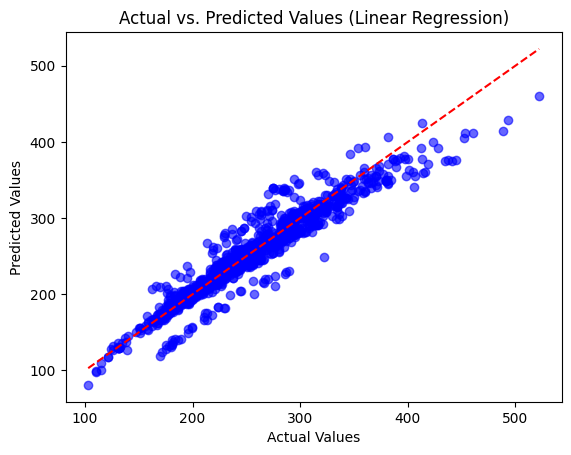

In [29]:
# Plot Actual vs. Predicted Values
plt.scatter(y_test, ypred_r, color='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values (Linear Regression)")
plt.show()

**Train a RandomForestRegressor**

In [30]:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(x_train, y_train)


RandomForestRegressor(random_state=42)

In [31]:
y_pred_rf= rf_regressor.predict(x_test)
y_pred_rf

array([307.52      , 238.885     , 297.235     , ..., 297.27571429,
       191.69033333, 192.39166667])

**Evaluate the model**

In [32]:
mse = mean_squared_error(y_test, y_pred_rf)
r2 = r2_score(y_test, y_pred_rf)

In [33]:
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 20.930562597946402
R-squared (R2): 0.9942000065036752


In [34]:
coefficients = regressor.coef_

**Feature Importances**

In [35]:
feature_importances = pd.DataFrame({
    'Feature': data.drop(columns=['CO2 Emissions(g/km)']).columns,
    'Importance': coefficients
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances:\n", feature_importances)



Feature Importances:
                              Feature  Importance
4                          Cylinders    9.416483
3                     Engine Size(L)    8.144775
8    Fuel Consumption Hwy (L/100 km)    8.142143
7   Fuel Consumption City (L/100 km)    7.790191
6                          Fuel Type    6.862980
9   Fuel Consumption Comb (L/100 km)    6.606483
2                      Vehicle Class    3.027832
0                               Make    1.088627
1                              Model    0.205186
5                       Transmission   -0.746084
10       Fuel Consumption Comb (mpg)  -19.254565


**Visualizing Heatmaps for Coefficients**

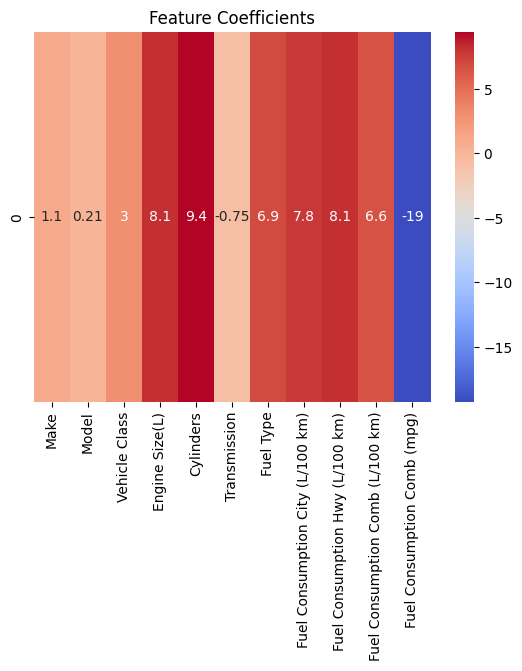

In [36]:
sns.heatmap(pd.DataFrame(coefficients, index=x.columns).T, annot=True, cmap="coolwarm")
plt.title('Feature Coefficients')
plt.show()

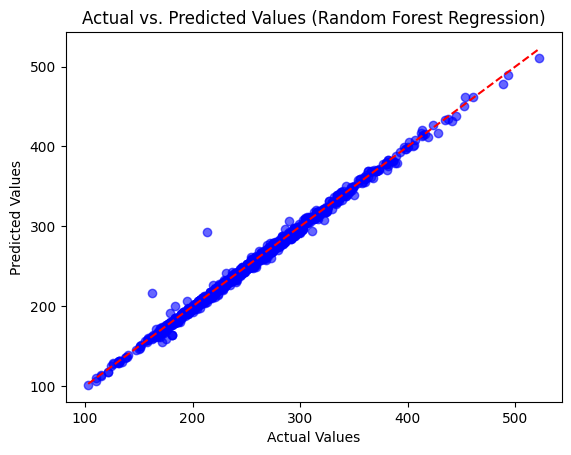

In [37]:
# Plot Actual vs. Predicted Values
plt.scatter(y_test, y_pred_rf, color='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values (Random Forest Regression)")
plt.show()


**Saving Models**

In [38]:
with open('linear_model.pkl', 'wb') as model_file:
    pickle.dump(regressor, model_file)

In [39]:
with open('RondomforestRegressor_model.pkl', 'wb') as model_file:
    pickle.dump(rf_regressor, model_file)